In [44]:
def read_csv(file_name):
    f = open(file_name,'r')
    data = f.read()
    split_data = data.split('\n')
    string_list = split_data[1:len(split_data)]
    final_list = []
    for item in string_list:
        int_fields = []
        string_fields = item.split(',')
        for itm in string_fields:
            int_fields.append(int(itm))
        final_list.append(int_fields)
    return final_list

In [45]:
cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")
cdc_list[:10]


[[1994, 1, 1, 6, 8096],
 [1994, 1, 2, 7, 7772],
 [1994, 1, 3, 1, 10142],
 [1994, 1, 4, 2, 11248],
 [1994, 1, 5, 3, 11053],
 [1994, 1, 6, 4, 11406],
 [1994, 1, 7, 5, 11251],
 [1994, 1, 8, 6, 8653],
 [1994, 1, 9, 7, 7910],
 [1994, 1, 10, 1, 10498]]

In [46]:
def month_births(data_lst):
    births_per_month = {}
    
    for lst in data_lst:
        month = lst[1]
        births = lst[4]
        if month in births_per_month:
            births_per_month[month] += births
        else:
            births_per_month[month] = births
    return births_per_month
        

In [47]:
cdc_month_births = month_births(cdc_list)
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [48]:
def dow_births(data_lst):
    births_per_day = {}
    
    for lst in data_lst:
        day = lst[3]
        births = lst[4]
        if day in births_per_day:
            births_per_day[day] += births
        else:
            births_per_day[day] = births
    return births_per_day

In [49]:
cdc_day_births = dow_births(cdc_list)
cdc_day_births

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

In [50]:
def calc_counts(data, column):
    total_births = {}
    
    for lst in data:
        column_data = lst[column]
        births = lst[4]
        if column_data in total_births:
            total_births[column_data] += births
        else:
            total_births[column_data] = births
    return total_births

In [51]:
cdc_year_births = calc_counts(cdc_list, 0)
cdc_year_births

{1994: 3952767,
 1995: 3899589,
 1996: 3891494,
 1997: 3880894,
 1998: 3941553,
 1999: 3959417,
 2000: 4058814,
 2001: 4025933,
 2002: 4021726,
 2003: 4089950}

In [52]:
cdc_month_births = calc_counts(cdc_list, 1)
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [53]:
cdc_dom_births = calc_counts(cdc_list,2)
cdc_dom_births

{1: 1276557,
 2: 1288739,
 3: 1304499,
 4: 1288154,
 5: 1299953,
 6: 1304474,
 7: 1310459,
 8: 1312297,
 9: 1303292,
 10: 1320764,
 11: 1314361,
 12: 1318437,
 13: 1277684,
 14: 1320153,
 15: 1319171,
 16: 1315192,
 17: 1324953,
 18: 1326855,
 19: 1318727,
 20: 1324821,
 21: 1322897,
 22: 1317381,
 23: 1293290,
 24: 1288083,
 25: 1272116,
 26: 1284796,
 27: 1294395,
 28: 1307685,
 29: 1223161,
 30: 1202095,
 31: 746696}

In [54]:
cdc_dow_births = calc_counts(cdc_list,3)
cdc_dow_births

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

In [55]:
def min_and_max(data_dict):
    results = {}
    
    for key in data_dict:
        val = data_dict[key]
        if "max" in results:
            if val > results["max"]:
                results["max"] = val 
        if "min" in results:
            if val < results["min"]:
                results["min"] = val
        else:
            results["max"] = val
            results["min"] = val
              
    return results   

In [56]:
funct_res = min_and_max(cdc_dow_births)
funct_res["max"]

6446196

In [57]:
def annual_trend(data_lst, column, dimension):
    years_lst = [1994,1995,1996,1997,1998,1999,2000,2001,2002,2003]
    year_val = {}
    deltas_lst = []
    current = 0
    last = 0
    
    for year in years_lst:
        tally = 0
        for itm in data_lst:
            if itm[0] == year:
                if itm[column] == dimension:
                    tally += itm[4]
        year_val[year] = tally
        
        current = tally
        if last == 0:        
            last = current
        else:
            delta = current - last
            last = current
            deltas_lst.append(delta)
    return deltas_lst

In [58]:
trend = annual_trend(cdc_list, 3, 7)
trend

[-2962, -12454, -8858, 2651, -5138, 14463, -19335, -5744, 1924]

In [59]:
def year_values(data_lst, column, dimension):
    years_lst = [1994,1995,1996,1997,1998,1999,2000,2001,2002,2003]
    year_val = []
    deltas_lst = []
    current = 0
    last = 0
    
    for year in years_lst:
        tally = 0
        for itm in data_lst:
            if itm[0] == year:
                if itm[column] == dimension:
                    tally += itm[4]
        year_val.append(tally)
        
    return year_val

In [60]:
years = year_values(cdc_list, 3, 7)
years

[428752,
 425790,
 413336,
 404478,
 407129,
 401991,
 416454,
 397119,
 391375,
 393299]

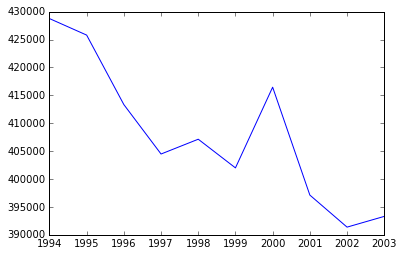

In [65]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

years_lst = [1994,1995,1996,1997,1998,1999,2000,2001,2002,2003]
y_pos = np.arange(len(years_lst))

plt.plot(y_pos, years)
plt.xticks(y_pos, years_lst)

plt.show()

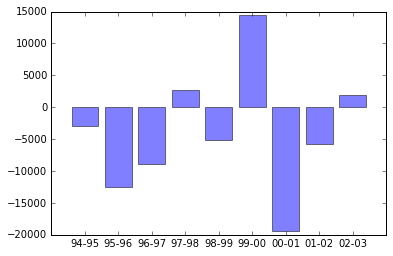

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

years_lst = ['94-95','95-96','96-97','97-98','98-99','99-00','00-01','01-02','02-03']
y_pos = np.arange(len(years_lst))

plt.bar(y_pos, trend, align = 'center', alpha = 0.5)
plt.xticks(y_pos, years_lst)

plt.show()